# Titanic Data Analysis

##  Does female who travel with family have higher survival rate then female who travel alone?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

In [2]:
titanic = pd.read_csv('titanic-data.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Cleaning up the Data

In [4]:
#Clean up the data types in the titanic dataframe.

titanic['Cabin']= titanic.Cabin.fillna('U') # U is for unknown
titanic['Embarked']= titanic.Embarked.fillna('U') #U is for unknown
titanic['Age']= titanic.Age.fillna(titanic.Age.mean()) #fill in Nan values with the mean age
titanic['Fare']= titanic.Fare.fillna(titanic.Fare.mean()) #fill in Nan values with mean fare price
titanic.Age = titanic.Age.astype(int) #Convert str into integer
titanic['Family'] = titanic['SibSp']+titanic['Parch'] #to combine siblings, parents, spouses, and children into family
titanic.index.drop # PassengerId is not necessary for this data analysis. So I deleted it.
titanic.drop(['SibSp','Parch'], axis=1, inplace=True) #dropped because I combined them in 'Family' column
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22,A/5 21171,7.2500,U,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7.9250,U,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,373450,8.0500,U,S,0
5,6,0,3,"Moran, Mr. James",male,29,330877,8.4583,U,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,349909,21.0750,U,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,347742,11.1333,U,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,237736,30.0708,U,C,1


### Creating the Dataframes and setting up equations for the analysis

In [5]:
female = titanic[titanic['Sex']=='female']
female.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7.9250,U,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,53.1000,C123,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,347742,11.1333,U,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,237736,30.0708,U,C,1


In [6]:
family = female[female['Family']!=0]
no_family = female[female['Family']==0]

In [7]:
family.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,PC 17599,71.2833,C85,C,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,113803,53.1000,C123,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,347742,11.1333,U,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,237736,30.0708,U,C,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,PP 9549,16.7000,G6,S,2


In [8]:
no_family.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,STON/O2. 3101282,7.9250,U,S,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,113783,26.5500,C103,S,0
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,350406,7.8542,U,S,0
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55,248706,16.0000,U,S,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,29,2649,7.2250,U,C,0


In [9]:
s = titanic[titanic['Embarked']=='S']
#dead, alive = s['Survived'].value_counts()
#print dead, 'died'
#print alive, 'alive'
#print float(alive)/891, 'survival rate'

In [10]:
def ttest(a,b):
    '''This function does the ttest of the survival rates between datasets a and b with the 95% confidence level. 
        This function will output the p-value, pvalue<0.05, and T to accept null or F to reject the null.'''
    t =scipy.stats.ttest_ind(a['Survived'],b['Survived'], equal_var=False)
    return t

def survival_rate(n):
    '''This function will calculate the mean of # survived of a subclass compared to the titanic population'''
    dead, alive = n['Survived'].value_counts()
    #print dead, 'died'
    #print alive, 'alive'
    return float(alive)/float(dead)

def stats(data):
    '''Summarize the given data'''
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)

In [11]:
stats(family['Survived'])

Mean: 0.712765957447
Standard deviation: 0.452471708897
Minimum: 0
Maximum: 1


In [12]:
stats(no_family['Survived'])

Mean: 0.785714285714
Standard deviation: 0.410325903324
Minimum: 0
Maximum: 1


In [13]:
family.shape

(188, 11)

In [14]:
no_family.shape

(126, 11)

In [15]:
ttest(family,no_family)

Ttest_indResult(statistic=-1.4762649018944958, pvalue=0.1409770087293242)

Populating the interactive namespace from numpy and matplotlib


(array([ 27.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  99.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

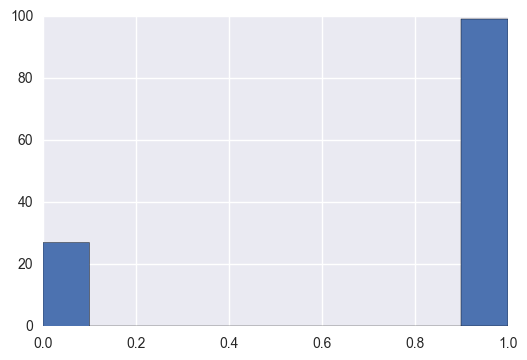

In [22]:
%pylab inline
plt.hist(no_family['Survived'])